In [1]:
import scipy.stats
import statsmodels.stats.multitest
from collections import Counter, defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,glob

In [2]:
configs = [('A_B','scrA_scrB'), # config_1
           ('scrA_B','scrA_scrB'), # config_2
           ('A_scrB','scrA_scrB')] # config_3

In [3]:
mpra_counts = pd.read_csv('../../miseq/mpraanalyze_results/dk_norm/count_matrix_df_normlog.csv',index_col=0)
mpra_counts

,A431_1,A431_2,A431_3,COLO_1,COLO_2,COLO_3,Colon_1,Colon_2,Colon_3,GM_1,GM_2,GM_3,KCD6_1,KCD6_2,KCD6_3,MC_1,MC_2,MC_3
EGR2::KLF4+GDSD6+2+A_scrB.1,20.181985,21.847290,20.604372,19.185192,19.608388,18.947695,20.764059,19.858356,20.315505,18.857948,20.072790,19.092132,20.258890,20.541317,20.055335,19.314158,18.561481,19.000013
ARID5B::NFE2L1+MM+10+scrA_B.7,13.927348,15.433229,13.764840,13.836016,15.034963,15.645585,13.961022,13.327211,13.844572,14.035983,15.224607,13.637971,13.755063,15.014631,15.735773,14.426197,13.509355,14.038168
NR2F1::THAP1+Colon+7+scrA_B.4,17.085906,17.934684,17.185754,17.754429,17.611633,19.256348,17.666106,17.292538,17.686104,17.051239,17.916488,17.220584,17.547214,17.360469,19.445749,17.707158,17.673472,17.740783
IRF8::MYBL2+GM12878+6+scrA_B.1,19.921669,18.467420,17.683608,18.023949,18.362249,19.472233,18.073797,18.153811,19.600108,19.221196,17.942702,17.282091,17.903691,18.101058,19.417121,17.907781,17.930040,19.547534
SP3::TFAP2C+SCC+8+A_B.4,14.568236,13.067054,12.882863,12.423720,11.936780,12.632239,12.799253,13.221106,12.961302,13.876956,12.815141,12.315450,12.822739,12.092450,12.771620,11.582958,12.287505,11.922066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IKZF1::MYBL2+GM12878+2+A_scrB.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SP2::THAP1+Colon+6+A_B.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
KLF5::NR2F1+Colon+1+A_B.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASCL2::KLF5+GDSD6+4+scrA_scrB.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
mpra_tissues = ['Colon', 'GM', 'COLO', 'MC', 'KCD6', 'A431']

In [5]:
instance_arr = [str(i+1) for i in range(10)]
print(instance_arr)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


In [6]:
vocab_arr =sorted(set(['+'.join(x.split('+')[:-2]) for x in list(mpra_counts.index)]))
vocab_arr = [x for x in vocab_arr if len(x)>0]
len(vocab_arr)
# vocab_arr

239

In [7]:
# check_str ='IRF4::PLAG1\+GM12878\+2'
# config=configs[0]
# higher_orient = config[0]
# lower_orient = config[1]
# #     print(higher_orient,lower_orient)

# x_vals = vocab_df_tissue[vocab_df_tissue.orient==higher_orient].value.values
# y_vals = vocab_df_tissue[vocab_df_tissue.orient==lower_orient].value.values
# print(x_vals,y_vals)

In [8]:
# %%time
# #### RUN ONCE
# # loopse 40320
# counter = 0
# results_dict = {}
# for vocab_tissue in vocab_arr: #239
#     vocab, tissue = vocab_tissue.split('+')
#     for instance in instance_arr: #10
#         check_str = vocab+'\+'+tissue+'\+'+instance
# #         print(check_str)
#         vocab_df = mpra_counts[mpra_counts.index.str.contains(check_str)].reset_index().melt('index')
#         vocab_df.columns = ['id','sample','value']
#         vocab_df = vocab_df[vocab_df['value']>1e-3]
#         if vocab_df.shape[0]<20:
#             print(check_str, 'not enough datapoints')
#             continue
#         vocab_df[['vocab_pair','tissue','instance','orient_bar']]= vocab_df['id'].str.split('+',expand=True)
#         vocab_df[['orient','barcode']]= vocab_df['orient_bar'].str.split('.',expand=True)
#         vocab_df[['mpra_tissue','rep']]= vocab_df['sample'].str.split('_',expand=True)
#         vocab_df.sort_values('orient',inplace=True)

#         for mpra_tissue in mpra_tissues: #6
#             vocab_df_tissue = vocab_df[vocab_df.mpra_tissue==mpra_tissue]
            
#             for idx, config in enumerate(configs): # 3
#                 config_str = 'config_'+str(idx+1)
#                 higher_orient = config[0]
#                 lower_orient = config[1]
#             #     print(higher_orient,lower_orient)

#                 x_vals = vocab_df_tissue[vocab_df_tissue.orient==higher_orient].value.values
#                 y_vals = vocab_df_tissue[vocab_df_tissue.orient==lower_orient].value.values
#                 stat, pval = scipy.stats.mannwhitneyu(x_vals, y_vals, alternative='greater')
#                 results_dict[counter] = {'vocab':vocab,
#                                         'tissue':tissue,
#                                         'instance':instance,
# #                                         'check_str':check_str,
#                                          'mpra_tissue':mpra_tissue,
#                                         'config':config_str,
#                                          'pval':pval}
#                 counter+=1
#                 if (counter%1000)==0:
#                     print(counter)
# #     print(vocab)

In [9]:
# #### only if run above
# results_df = pd.DataFrame.from_dict(results_dict,orient='index')
# results_df['p_adjust'] =statsmodels.stats.multitest.fdrcorrection(results_df.pval, alpha=0.05, method='indep', is_sorted=False)[1]
# results_df['sig_bool'] =statsmodels.stats.multitest.fdrcorrection(results_df.pval, alpha=0.05, method='indep', is_sorted=False)[0]
# print(results_df.shape)
# results_df.to_csv('../data/processed/mpra/vocab_classes.csv')

In [10]:
### read in if not run above
results_df = pd.read_csv('../data/processed/mpra/vocab_classes.csv',index_col=0)
results_df[:5]

,vocab,tissue,instance,mpra_tissue,config,pval,p_adjust,sig_bool
0,ARID5B::KLF5,GDSD6,1,Colon,config_1,0.571403,1.000000,False
1,ARID5B::KLF5,GDSD6,1,Colon,config_2,0.050763,0.225446,False
2,ARID5B::KLF5,GDSD6,1,Colon,config_3,0.917650,1.000000,False
3,ARID5B::KLF5,GDSD6,1,GM,config_1,0.352758,0.776349,False
4,ARID5B::KLF5,GDSD6,1,GM,config_2,0.055414,0.239774,False


In [11]:
results_df[results_df.config=='config_1'].pval.describe()

count    1.425600e+04
mean     4.518918e-01
std      3.885169e-01
min      4.348506e-10
25%      4.553935e-02
50%      3.837414e-01
75%      8.770931e-01
max      1.000000e+00
Name: pval, dtype: float64

In [12]:
Counter(results_df['sig_bool'])


Counter({False: 37827, True: 4941})

In [13]:
# classes
# AND
# - A_B > scrA_scrB AND NOT(scrA_B > scrA_scrB) AND NOT(A_scrB > scrA_scrB)

# OR: Non competitive
# - (A_B > scrA_scrB) AND (scrA_B > scrA_scrB) AND (A_scrB > scrA_scrB) 

# XOR: competitive
# - NOT(A_B > scrA_scrB) AND(scrA_B > scrA_scrB) AND (A_scrB > scrA_scrB) 

# LEADING_A
# - A_B > scrA_scrB, AND NOT(scrA_B > scrA_scrB) AND (A_scrB > scrA_scrB)

# LEADING_B
# - A_B > scrA_scrB, AND (scrA_B > scrA_scrB) AND NOT(A_scrB > scrA_scrB)


results_df.columns


Index(['vocab', 'tissue', 'instance', 'mpra_tissue', 'config', 'pval',
       'p_adjust', 'sig_bool'],
      dtype='object')

In [32]:
def classify(row):
    if row['config_1']: # 
        if row['config_2']:
            if not row['config_3']:
                return 'LEADING_B'
        if row['config_3']:
            if not row['config_2']:
                return 'LEADING_A'
        if (not row['config_2'] ) and (not row['config_3']) :
            return 'AND'
        if row['config_2'] and row['config_3']:# 
            return 'OR'
    else: # NOT ('A_B','scrA_scrB')
        if row['config_2'] and row['config_3']:
            return 'XOR'
    return 'other'

In [33]:
results_df['id'] = results_df.vocab+'+'+ results_df.tissue +'+'+ results_df.instance.map(str) + '+' + results_df.mpra_tissue
results_df_piv = results_df.pivot(index='id',columns='config',values='sig_bool').reset_index()
results_df_piv['class'] = results_df_piv.apply(classify,axis=1)
results_df_piv[['vocab', 'tissue', 'instance', 'mpra_tissue']] =results_df_piv['id'].str.split('+',expand=True)
results_df_piv#['type']

config,id,config_1,config_2,config_3,class,vocab,tissue,instance,mpra_tissue
0,ARID5B::KLF5+GDSD6+1+A431,False,False,False,other,ARID5B::KLF5,GDSD6,1,A431
1,ARID5B::KLF5+GDSD6+1+COLO,False,False,False,other,ARID5B::KLF5,GDSD6,1,COLO
2,ARID5B::KLF5+GDSD6+1+Colon,False,False,False,other,ARID5B::KLF5,GDSD6,1,Colon
3,ARID5B::KLF5+GDSD6+1+GM,False,False,False,other,ARID5B::KLF5,GDSD6,1,GM
4,ARID5B::KLF5+GDSD6+1+KCD6,False,False,False,other,ARID5B::KLF5,GDSD6,1,KCD6
...,...,...,...,...,...,...,...,...,...
14251,ZFX::E2F6+SCC+9+COLO,True,False,False,AND,ZFX::E2F6,SCC,9,COLO
14252,ZFX::E2F6+SCC+9+Colon,True,False,False,AND,ZFX::E2F6,SCC,9,Colon
14253,ZFX::E2F6+SCC+9+GM,True,False,False,AND,ZFX::E2F6,SCC,9,GM
14254,ZFX::E2F6+SCC+9+KCD6,True,False,False,AND,ZFX::E2F6,SCC,9,KCD6


In [34]:

results_df_piv.to_csv('../data/processed/mpra/results_df_piv.csv')

In [35]:
results_df_piv['config_1'].value_counts()

False    12249
True      2007
Name: config_1, dtype: int64

In [36]:
results_df_piv['class'].value_counts()

other        12081
AND           1046
LEADING_B      347
LEADING_A      320
OR             294
XOR            168
Name: class, dtype: int64

In [37]:
tissue_to_mpra_tissue = dict(zip(['GDSD6', 'MM', 'SCC', 'Colon' ,'GM12878' ,'Melanocytes'], ['KCD6', 'COLO' ,'A431','Colon', 'GM' , 'MC']))

In [38]:
results_df_piv['tissue_match'] = results_df_piv.apply(lambda row: tissue_to_mpra_tissue[row.tissue]==row.mpra_tissue,axis=1)

In [39]:
results_df_piv[results_df_piv.tissue_match]['class'].value_counts()

other        1990
AND           189
LEADING_B      61
LEADING_A      51
OR             51
XOR            34
Name: class, dtype: int64

In [40]:
results_df_piv

config,id,config_1,config_2,config_3,class,vocab,tissue,instance,mpra_tissue,tissue_match
0,ARID5B::KLF5+GDSD6+1+A431,False,False,False,other,ARID5B::KLF5,GDSD6,1,A431,False
1,ARID5B::KLF5+GDSD6+1+COLO,False,False,False,other,ARID5B::KLF5,GDSD6,1,COLO,False
2,ARID5B::KLF5+GDSD6+1+Colon,False,False,False,other,ARID5B::KLF5,GDSD6,1,Colon,False
3,ARID5B::KLF5+GDSD6+1+GM,False,False,False,other,ARID5B::KLF5,GDSD6,1,GM,False
4,ARID5B::KLF5+GDSD6+1+KCD6,False,False,False,other,ARID5B::KLF5,GDSD6,1,KCD6,True
...,...,...,...,...,...,...,...,...,...,...
14251,ZFX::E2F6+SCC+9+COLO,True,False,False,AND,ZFX::E2F6,SCC,9,COLO,False
14252,ZFX::E2F6+SCC+9+Colon,True,False,False,AND,ZFX::E2F6,SCC,9,Colon,False
14253,ZFX::E2F6+SCC+9+GM,True,False,False,AND,ZFX::E2F6,SCC,9,GM,False
14254,ZFX::E2F6+SCC+9+KCD6,True,False,False,AND,ZFX::E2F6,SCC,9,KCD6,False


# do a comparison of cancer vs normal

addition 6/14/2021

In [41]:
results_df_piv_cancer_nl = results_df_piv[results_df_piv.tissue.isin(['Melanocytes','MM'])]
results_df_piv_cancer_nl = results_df_piv_cancer_nl[results_df_piv_cancer_nl.mpra_tissue.isin(['COLO','MC'])]
results_df_piv_cancer_nl['vocab_tissue_instance'] = results_df_piv_cancer_nl.vocab + '+' + results_df_piv_cancer_nl.tissue + '+' + results_df_piv_cancer_nl.instance.map(str)
results_df_piv_cancer_nl = results_df_piv_cancer_nl.pivot(index='vocab_tissue_instance',columns = 'mpra_tissue',values='class').reset_index().fillna('other')
print(results_df_piv_cancer_nl.shape)
results_df_piv_cancer_nl[results_df_piv_cancer_nl.COLO!=results_df_piv_cancer_nl.MC]



(660, 3)


mpra_tissue,vocab_tissue_instance,COLO,MC
8,ARID5B::LEF1+MM+8,other,AND
22,ARID5B::SOX10+MM+2,LEADING_A,OR
39,ARID5B::STAT1+MM+9,other,AND
42,E2F4::KLF15+Melanocytes+2,OR,LEADING_A
56,EGR2::NFE2L1+MM+6,other,AND
107,EN2::PRRX1+Melanocytes+7,other,AND
111,EN2::STAT1+MM+10,AND,LEADING_A
113,EN2::STAT1+MM+3,LEADING_B,AND
116,EN2::STAT1+MM+6,AND,other
124,ETV2::PRRX1+Melanocytes+4,AND,other


In [42]:
results_df_piv_cancer_nl = results_df_piv[results_df_piv.tissue.isin(['GDSD6','SCC'])]
results_df_piv_cancer_nl = results_df_piv_cancer_nl[results_df_piv_cancer_nl.mpra_tissue.isin(['A431','KCD6'])]
results_df_piv_cancer_nl['vocab_tissue_instance'] = results_df_piv_cancer_nl.vocab + '+' + results_df_piv_cancer_nl.tissue + '+' + results_df_piv_cancer_nl.instance.map(str)
results_df_piv_cancer_nl = results_df_piv_cancer_nl.pivot(index='vocab_tissue_instance',columns = 'mpra_tissue',values='class').reset_index().fillna('other')
print(results_df_piv_cancer_nl.shape)
results_df_piv_cancer_nl[results_df_piv_cancer_nl.A431!=results_df_piv_cancer_nl.KCD6]



(911, 3)


mpra_tissue,vocab_tissue_instance,A431,KCD6
12,ARNT::SP1+SCC+2,OR,LEADING_B
13,ARNT::SP1+SCC+3,LEADING_A,other
18,ARNT::SP1+SCC+8,OR,other
44,BACH1::KLF5+GDSD6+4,OR,XOR
58,E2F1::SP1+SCC+8,XOR,other
73,E2F6::SP1+SCC+3,XOR,OR
83,EGR1::SP1+SCC+3,other,AND
94,EGR1::SP3+SCC+4,AND,LEADING_A
101,EGR2::FOSL2+GDSD6+10,other,LEADING_A
122,EGR2::JUNB+GDSD6+2,other,XOR


# pivot over all (regardless of tissue match)

In [43]:
results_df_piv_count = results_df_piv[results_df_piv['class']!='other'].groupby(['vocab','tissue','mpra_tissue']).agg({
    'class':'|'.join,'instance':['|'.join,'count']
}).reset_index()
results_df_piv_count.columns = ['vocab','tissue','mpra_tissue','class','instance','count']
# results_df_piv_count[results_df_piv_count.instance>3]

In [44]:
results_df_piv_count['consensus_class'] = 'other'
for idx, row in results_df_piv_count.iterrows():
    class_arr =[ x for x in row['class'].split('|') if x!='other']
    if len(class_arr)>0:
        mode_class = max(set(class_arr), key=class_arr.count)
        count_classes = Counter(class_arr)
#         print(row['vocab'],mode_class)
#         print(count_classes)
        if count_classes[mode_class]>1:
            results_df_piv_count.at[idx,'consensus_class'] =mode_class


In [45]:
results_df_piv_count['vocab_tissue'] = results_df_piv_count.vocab + '+' + results_df_piv_count.tissue #+ '+' #+ results_df_piv_cancer_nl.instance.map(str)

results_df_piv_count#.consensus_class.value_counts()

,vocab,tissue,mpra_tissue,class,instance,count,consensus_class,vocab_tissue
0,ARID5B::KLF5,GDSD6,A431,LEADING_B|OR,4|9,2,other,ARID5B::KLF5+GDSD6
1,ARID5B::KLF5,GDSD6,COLO,LEADING_B|OR,4|9,2,other,ARID5B::KLF5+GDSD6
2,ARID5B::KLF5,GDSD6,Colon,AND|OR,4|9,2,other,ARID5B::KLF5+GDSD6
3,ARID5B::KLF5,GDSD6,GM,LEADING_B|OR,4|9,2,other,ARID5B::KLF5+GDSD6
4,ARID5B::KLF5,GDSD6,KCD6,LEADING_B|OR,4|9,2,other,ARID5B::KLF5+GDSD6
...,...,...,...,...,...,...,...,...
1098,ZFX::E2F6,SCC,COLO,AND,9,1,other,ZFX::E2F6+SCC
1099,ZFX::E2F6,SCC,Colon,AND|AND,3|9,2,AND,ZFX::E2F6+SCC
1100,ZFX::E2F6,SCC,GM,AND,9,1,other,ZFX::E2F6+SCC
1101,ZFX::E2F6,SCC,KCD6,AND,9,1,other,ZFX::E2F6+SCC


In [46]:
results_df_piv_count.to_csv('../data/processed/mpra/results_df_piv_count.csv')
# 

In [47]:
results_df_diff_tissue = results_df_piv_count.pivot(index='vocab_tissue',columns = 'mpra_tissue',values='consensus_class').reset_index().fillna('other')
print(results_df_diff_tissue.shape)
results_df_diff_tissue[['vocab','tissue']] = results_df_diff_tissue.vocab_tissue.str.split('+',expand=True)
results_df_diff_tissue.to_csv('../data/processed/mpra/results_df_diff_tissue.csv')
results_df_diff_tissue[:5]
# results_df_piv_count[results_df_piv_count.A431!=results_df_piv_count.KCD6]



(207, 7)


mpra_tissue,vocab_tissue,A431,COLO,Colon,GM,KCD6,MC,vocab,tissue
0,ARID5B::KLF5+GDSD6,other,other,other,other,other,other,ARID5B::KLF5,GDSD6
1,ARID5B::LEF1+MM,AND,other,AND,AND,other,AND,ARID5B::LEF1,MM
2,ARID5B::NFE2L1+MM,other,other,other,other,other,other,ARID5B::NFE2L1,MM
3,ARID5B::SOX10+MM,OR,other,OR,other,other,OR,ARID5B::SOX10,MM
4,ARID5B::STAT1+MM,other,other,other,other,other,other,ARID5B::STAT1,MM


In [48]:
# for kc vs scc
def check_good(row):
    tissue_to_check = row['tissue']
    if (row[tissue_to_check]!='other'):
        return True
    else:
        return False
kc_scc_diff = results_df_diff_tissue[results_df_diff_tissue.tissue.isin(['GDSD6','SCC'])]
kc_scc_diff['class_same'] = kc_scc_diff.A431==kc_scc_diff.KCD6
print(kc_scc_diff.class_same.value_counts())
kc_scc_diff.to_csv('../data/processed/mpra/kc_scc_diff.csv')
kc_scc_diff_filt = kc_scc_diff[~kc_scc_diff.class_same][['vocab_tissue','A431','KCD6']]
kc_scc_diff_filt[['vocab','tissue']] = kc_scc_diff_filt.vocab_tissue.str.split('+',expand=True)
kc_scc_diff_filt['tissue'] = kc_scc_diff_filt.tissue.map(tissue_to_mpra_tissue)
kc_scc_diff_filt['check_vignette'] = kc_scc_diff_filt.apply(check_good, axis=1)
kc_scc_diff_filt = kc_scc_diff_filt[kc_scc_diff_filt.check_vignette]
display(kc_scc_diff_filt)
kc_scc_diff_filt.to_csv('../data/processed/mpra/kc_scc_diff_filt.csv')

# kc_scc_diff_long = kc_scc_diff[['vocab_tissue','A431','KCD6']].melt('vocab_tissue')
# kc_scc_diff

True     59
False    14
Name: class_same, dtype: int64


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


mpra_tissue,vocab_tissue,A431,KCD6,vocab,tissue,check_vignette
5,ARNT::SP1+SCC,OR,AND,ARNT::SP1,A431,True
63,HMGA1::KLF5+GDSD6,other,AND,HMGA1::KLF5,KCD6,True
106,KLF4::KLF5+SCC,AND,other,KLF4::KLF5,A431,True
132,MAFG::RORA+GDSD6,other,OR,MAFG::RORA,KCD6,True
148,NFE2L1::RORA+GDSD6,other,OR,NFE2L1::RORA,KCD6,True
162,PRDM1::RORA+GDSD6,other,AND,PRDM1::RORA,KCD6,True
168,PURA::SP1+SCC,LEADING_A,other,PURA::SP1,A431,True
182,SP1::SP2+SCC,XOR,other,SP1::SP2,A431,True


In [49]:
# for melanocytes vs mm
mc_mm_diff = results_df_diff_tissue[results_df_diff_tissue.tissue.isin(['Melanocytes','MM'])]
mc_mm_diff['class_same'] = mc_mm_diff.COLO==mc_mm_diff.MC
print(mc_mm_diff.class_same.value_counts())
mc_mm_diff.to_csv('../data/processed/mpra/mc_mm_diff.csv')
mc_mm_diff_filt = mc_mm_diff[~mc_mm_diff.class_same][['vocab_tissue','COLO','MC']]
mc_mm_diff_filt[['vocab','tissue']] = mc_mm_diff_filt.vocab_tissue.str.split('+',expand=True)
mc_mm_diff_filt['tissue'] = mc_mm_diff_filt.tissue.map(tissue_to_mpra_tissue)
mc_mm_diff_filt['check_vignette'] = mc_mm_diff_filt.apply(check_good, axis=1)
mc_mm_diff_filt = mc_mm_diff_filt[mc_mm_diff_filt.check_vignette]
display(mc_mm_diff_filt)
mc_mm_diff_filt.to_csv('../data/processed/mpra/mc_mm_diff_filt.csv')


True     45
False    17
Name: class_same, dtype: int64


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


mpra_tissue,vocab_tissue,COLO,MC,vocab,tissue,check_vignette
39,EN2::PRRX1+Melanocytes,other,AND,EN2::PRRX1,MC,True
40,EN2::STAT1+MM,AND,other,EN2::STAT1,COLO,True
45,ETV2::SP2+Melanocytes,other,XOR,ETV2::SP2,MC,True
67,HMGA1::STAT1+MM,AND,other,HMGA1::STAT1,COLO,True
104,KLF15::ZNF589+Melanocytes,other,AND,KLF15::ZNF589,MC,True
128,LEF1::SOX13+MM,XOR,other,LEF1::SOX13,COLO,True
144,NFATC4::STAT1+MM,AND,other,NFATC4::STAT1,COLO,True
153,NFE2L1::ZBTB49+MM,AND,other,NFE2L1::ZBTB49,COLO,True
177,SOX10::SOX13+MM,AND,other,SOX10::SOX13,COLO,True
195,SP2::ZNF324+Melanocytes,other,AND,SP2::ZNF324,MC,True


In [50]:
# vocab_df = mpra_counts[mpra_counts.index.str.contains('KLF5::MAFG\+GDSD6\+2')].reset_index().melt('index')
# vocab_df.columns = ['id','sample','value']
# vocab_df[['vocab_pair','tissue','instance','orient_bar']]= vocab_df['id'].str.split('+',expand=True)
# vocab_df[['orient','barcode']]= vocab_df['orient_bar'].str.split('.',expand=True)
# vocab_df[['mpra_tissue','rep']]= vocab_df['sample'].str.split('_',expand=True)
# vocab_df.sort_values('orient',inplace=True)
# vocab_df

## pivot over only tissue match

In [51]:
results_df_class = results_df.copy()
results_df_class['sig_bool'] =results_df_class.pval< (0.05/3) # because 3 tests per instance #statsmodels.stats.multitest.fdrcorrection(results_df.pval, alpha=0.05, method='indep', is_sorted=False)[0]
Counter(results_df_class['sig_bool'])


Counter({False: 35962, True: 6806})

In [52]:
results_df_class['id'] = results_df_class.vocab+'+'+ results_df_class.tissue +'+'+ results_df_class.instance.map(str) + '+' + results_df_class.mpra_tissue
results_df_class_piv = results_df_class.pivot(index='id',columns='config',values='sig_bool').reset_index()
results_df_class_piv['class'] = results_df_class_piv.apply(classify,axis=1)
results_df_class_piv[['vocab', 'tissue', 'instance', 'mpra_tissue']] =results_df_class_piv['id'].str.split('+',expand=True)
results_df_class_piv['tissue_match'] = results_df_class_piv.apply(lambda row: tissue_to_mpra_tissue[row.tissue]==row.mpra_tissue,axis=1)
# results_df_class_piv#['type']

In [53]:
results_df_piv_match_count = results_df_class_piv[results_df_class_piv.tissue_match].groupby(['vocab','tissue','mpra_tissue']).agg({
    'class':'|'.join,'instance':['|'.join,'count']
}).reset_index()
results_df_piv_match_count.columns = ['vocab','tissue','mpra_tissue','class','instance','count']
# results_df_piv_count[results_df_piv_count.instance>3]

In [54]:
results_df_piv_match_count.shape

(239, 6)

In [55]:
results_df_piv_match_count.vocab.unique().shape# all vocab's are represented

(239,)

In [56]:
order_classes = ['AND','LEADING_A','LEADING_B','XOR','OR','other']
order_classes.reverse()
order_classes

['other', 'OR', 'XOR', 'LEADING_B', 'LEADING_A', 'AND']

In [57]:
results_df_piv_match_count['consensus_class'] = 'other'
results_df_piv_match_count['count_consensus'] = 0
for idx, row in results_df_piv_match_count.iterrows():
    class_arr =[ x for x in row['class'].split('|') if x!='other']
    if len(class_arr)>0:
        mode_class = max(set(class_arr), key=class_arr.count)
        count_classes = Counter(class_arr)
        for class_check in order_classes:
            if count_classes[mode_class]== count_classes[class_check]:
                mode_class = class_check
#         print(row['vocab'],mode_class)
#         print(count_classes)
        if count_classes[mode_class]>1:
            results_df_piv_match_count.at[idx,'consensus_class'] =mode_class
            results_df_piv_match_count.at[idx,'count_consensus'] = count_classes[mode_class]

In [58]:
results_df_piv_match_count['consensus_class'].value_counts()

other        147
AND           56
LEADING_B     12
LEADING_A     11
OR            11
XOR            2
Name: consensus_class, dtype: int64

In [59]:
results_df_piv_match_count.tissue.value_counts()

GDSD6          49
SCC            43
Colon          42
MM             40
GM12878        39
Melanocytes    26
Name: tissue, dtype: int64

In [60]:
results_df_piv_match_count[results_df_piv_match_count.consensus_class=='LEADING_A']

,vocab,tissue,mpra_tissue,class,instance,count,consensus_class,count_consensus
6,ASCL2::KLF4,GDSD6,KCD6,LEADING_A|other|other|LEADING_A|other|other|ot...,1|10|2|3|4|5|6|7|8|9,10,LEADING_A,2
29,EGR2::KLF4,GDSD6,KCD6,other|LEADING_A|LEADING_A|other|other|OR|other...,1|10|2|3|4|5|6|7|8|9,10,LEADING_A,2
42,EN2::PRRX1,Melanocytes,MC,other|other|LEADING_A|AND|other|other|other|LE...,1|10|2|3|4|5|6|7|8|9,10,LEADING_A,2
60,FOXM1::SP2,Colon,Colon,other|other|other|LEADING_A|other|other|other|...,1|10|2|3|4|5|6|7|8|9,10,LEADING_A,2
72,HMGA1::STAT1,MM,COLO,other|other|other|other|LEADING_A|other|other|...,1|10|2|3|4|5|6|7|8|9,10,LEADING_A,2
97,IRF8::ZNF394,GM12878,GM,other|other|other|LEADING_A|LEADING_A|other|ot...,1|10|2|3|4|5|6|7|8|9,10,LEADING_A,2
155,MITF::PRRX1,Melanocytes,MC,LEADING_A|LEADING_A|other|other|other|other|ot...,1|10|2|3|4|5|6|7|8|9,10,LEADING_A,2
164,NFATC4::SOX10,MM,COLO,LEADING_A|LEADING_A|other|other|other|other|ot...,1|10|2|3|4|5|6|7|8|9,10,LEADING_A,2
184,PBX1::PRRX1,Melanocytes,MC,other|other|other|other|other|other|other|othe...,1|10|2|3|4|5|6|7|8|9,10,LEADING_A,2
215,SP1::VEZF1,SCC,A431,LEADING_B|other|AND|LEADING_A|other|LEADING_A|...,1|10|2|3|4|5|6|7|8|9,10,LEADING_A,2


In [61]:
results_df_piv_match_count[['tf1','tf2']]=results_df_piv_match_count.vocab.str.split('::',expand=True)

In [62]:
# replace LEADING_A and LEADING_B with LEADING

results_df_piv_match_count['consensus_class']= results_df_piv_match_count.consensus_class.str.replace('LEADING_A','LEADING')
results_df_piv_match_count['consensus_class'] = results_df_piv_match_count.consensus_class.str.replace('LEADING_B','LEADING')

In [63]:
results_df_piv_match_count.to_csv('../data/processed/mpra/results_df_piv_match_count.csv')


In [64]:
results_df_piv_match_count = pd.read_csv('../data/processed/mpra/results_df_piv_match_count.csv',index_col=0)
results_df_piv_match_count

,vocab,tissue,mpra_tissue,class,instance,count,consensus_class,count_consensus,tf1,tf2
0,ARID5B::KLF5,GDSD6,KCD6,other|other|other|other|LEADING_B|other|other|...,1|10|2|3|4|5|6|7|8|9,10,other,0,ARID5B,KLF5
1,ARID5B::LEF1,MM,COLO,other|LEADING_B|other|other|other|AND|other|ot...,1|10|2|3|4|5|6|7|8|9,10,AND,2,ARID5B,LEF1
2,ARID5B::NFE2L1,MM,COLO,other|other|other|other|other|other|other|othe...,1|10|2|3|4|5|6|7|8|9,10,other,0,ARID5B,NFE2L1
3,ARID5B::SOX10,MM,COLO,other|other|LEADING_A|AND|other|other|other|OR...,1|10|2|3|4|5|6|7|8|9,10,other,0,ARID5B,SOX10
4,ARID5B::STAT1,MM,COLO,other|other|other|other|other|other|other|othe...,1|10|2|3|4|5|6|7|8|9,10,other,0,ARID5B,STAT1
...,...,...,...,...,...,...,...,...,...,...
234,TFAP2B::ZNF589,Melanocytes,MC,other|other|other|other|other|other|other|othe...,1|10|2|3|4|5|6|7|8|9,10,other,0,TFAP2B,ZNF589
235,TFAP2C::ZBTB14,SCC,A431,other|other|other|other|other|other|LEADING_B|...,1|10|2|3|4|5|6|7|8|9,10,other,0,TFAP2C,ZBTB14
236,TFAP2C::ZNF219,SCC,A431,other|other|other|AND|other|other|other|other,1|10|2|5|6|7|8|9,8,other,0,TFAP2C,ZNF219
237,THAP1::THRB,Colon,Colon,other|other|other|other|AND|other|LEADING_A|ot...,1|10|2|3|4|5|6|7|8|9,10,LEADING,2,THAP1,THRB


AND        56
LEADING    23
OR         11
XOR         2
Name: consensus_class, dtype: int64

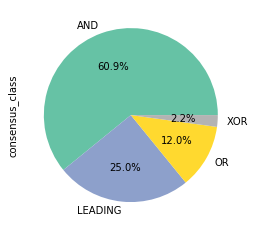

In [65]:
plt.gca().set_prop_cycle(None)
all_vocab_counts = results_df_piv_match_count.consensus_class.value_counts()
all_vocab_counts = all_vocab_counts[all_vocab_counts.index!='other']
ax = all_vocab_counts.sort_index().plot.pie(autopct="%.1f%%", startangle=0,colormap='Set2')
plt.savefig('../data/processed/mpra/class_type_pie.pdf')
all_vocab_counts

AND        35
LEADING    17
OR          6
Name: consensus_class, dtype: int64

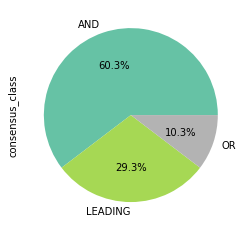

In [66]:
plt.figure()
plt.gca().set_prop_cycle(None)
normal_counts = results_df_piv_match_count[results_df_piv_match_count.tissue.isin(['GDSD6','Colon','GM12878','Melanocytes'])].consensus_class.value_counts().sort_index()
normal_counts = normal_counts[normal_counts.index!='other']
ax = normal_counts.plot.pie(autopct="%.1f%%", startangle=0,colormap='Set2')
plt.savefig('../data/processed/mpra/class_type_pie_normal.pdf')
normal_counts

AND        21
LEADING     6
OR          5
XOR         2
Name: consensus_class, dtype: int64

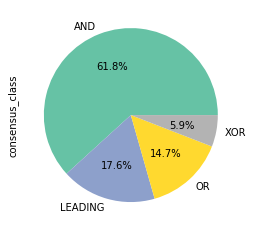

In [67]:
plt.figure()
cancer_counts = results_df_piv_match_count[results_df_piv_match_count.tissue.isin(['MM','SCC'])].consensus_class.value_counts().sort_index()
cancer_counts = cancer_counts[cancer_counts.index!='other']

ax = cancer_counts.plot.pie(autopct="%.1f%%", startangle=0,colormap='Set2')
plt.savefig('../data/processed/mpra/class_type_pie_cancer.pdf')
cancer_counts

In [68]:
test = results_df_piv_match_count[results_df_piv_match_count['class'].str.contains('XOR')]
test[test['class'].str.count('XOR')>1]

,vocab,tissue,mpra_tissue,class,instance,count,consensus_class,count_consensus,tf1,tf2
171,NFE2L1::SP4,MM,COLO,other|other|other|AND|other|XOR|other|other|OR...,1|10|2|3|4|5|6|7|8|9,10,XOR,2,NFE2L1,SP4
208,SP1::SP2,SCC,A431,XOR|XOR|other|other|other|other|other|other|AN...,1|10|2|3|4|5|6|7|8|9,10,XOR,2,SP1,SP2


In [69]:
results_df_piv_match_count[results_df_piv_match_count.vocab=='KLF5::MAFG']

,vocab,tissue,mpra_tissue,class,instance,count,consensus_class,count_consensus,tf1,tf2
128,KLF5::MAFG,GDSD6,KCD6,other|AND|XOR|other|other|AND|other|OR|other|o...,1|10|2|3|4|5|6|7|8|9,10,AND,2,KLF5,MAFG


In [70]:
results_df_piv_match_count.to_csv('../data/processed/mpra/results_df_piv_match_count.csv')

In [71]:
results_df_piv_match_count[results_df_piv_match_count['consensus_class']=='AND'].vocab.values

array(['ARID5B::LEF1', 'ARNT::SP1', 'BACH1::KLF5', 'E2F6::SP1',
       'E2F7::THAP1', 'EBF1::SP4', 'EBF1::ZNF816', 'EGR1::SP3',
       'EGR2::FOSL2', 'EGR2::NFE2L1', 'EGR2::RARG', 'EGR2::RORA',
       'EN2::STAT1', 'ETV2::PRRX1', 'ETV2::SP2', 'FOXD3::PRRX1',
       'FOXM1::KLF15', 'FOXM1::SP4', 'HBP1::IRF8', 'HBP1::STAT1',
       'HMGA1::KLF5', 'IKZF1::ZNF563', 'IRF4::SP4', 'IRF8::SPIB',
       'IRF8::ZBTB49', 'JUNB::RORA', 'KLF15::OTX1', 'KLF15::SNAI2',
       'KLF15::ZNF589', 'KLF16::TFAP2C', 'KLF4::KLF5', 'KLF5::MAFG',
       'KLF5::MAFK', 'KLF5::NFYB', 'KLF5::NR2F1', 'KLF5::RUNX3',
       'KLF5::SOX13', 'MAF::RORA', 'MAZ::SP1', 'MITF::ZNF589',
       'MSX2::THAP1', 'NFAT5::STAT1', 'NFATC4::STAT1', 'NFE2L1::NR3C1',
       'NFE2L1::TBX15', 'NFE2L1::ZBTB49', 'OSR2::THAP1', 'PRDM1::RORA',
       'RFX2::THAP1', 'SOX10::SOX13', 'SOX10::SP4', 'SP1::TFDP1',
       'SP1::ZBTB14', 'SP1::ZBTB17', 'SP1::ZNF770', 'SP4::THAP1'],
      dtype=object)

In [72]:
results_df_piv_match_count[results_df_piv_match_count['consensus_class']=='AND'].tissue.values

array(['MM', 'SCC', 'GDSD6', 'SCC', 'Colon', 'GM12878', 'GM12878', 'SCC',
       'GDSD6', 'MM', 'GDSD6', 'GDSD6', 'MM', 'Melanocytes',
       'Melanocytes', 'Melanocytes', 'Colon', 'Colon', 'GM12878', 'MM',
       'GDSD6', 'GM12878', 'GM12878', 'GM12878', 'GM12878', 'GDSD6',
       'Colon', 'Colon', 'Melanocytes', 'SCC', 'SCC', 'GDSD6', 'GDSD6',
       'Melanocytes', 'Colon', 'Colon', 'Colon', 'GDSD6', 'SCC',
       'Melanocytes', 'Colon', 'MM', 'MM', 'MM', 'MM', 'MM', 'Colon',
       'GDSD6', 'Colon', 'MM', 'MM', 'SCC', 'SCC', 'SCC', 'SCC', 'Colon'],
      dtype=object)

# make figures


In [73]:
['Melanocytes'] 

['KCD6' 'COLO' 'MC' 'Colon' 'GM' 'A431']


['KCD6COLOMCColonGMA431']

In [74]:
def make_figure(vocab, tissue, instance, df = mpra_counts.reset_index(), save_fig=False):
    check_str = vocab+'\+'+tissue+'\+'+instance
    title = '+'.join([vocab, tissue, instance])
    plot_df = df[df['index'].str.contains(check_str)].melt('index')
    plot_df.columns = ['id','sample','value']
    plot_df[['vocab_pair','tissue','instance','orient_bar']]= plot_df['id'].str.split('+',expand=True)
    plot_df[['orient','barcode']]= plot_df['orient_bar'].str.split('.',expand=True)
    plot_df[['mpra_tissue','rep']]= plot_df['sample'].str.split('_',expand=True)
    plot_df.sort_values('orient',inplace=True)
#     print(plot_df.tissue.unique(),plot_df.mpra_tissue.unique())
#     ax = sns.boxplot(x="mpra_tissue", y="value", hue="orient",hue_order = ['scrA_scrB','scrA_B','A_scrB','A_B'],
#                        data=plot_df, palette="Set2", dodge=True)
#     ax.set_title(title)
#     plt.show()
    ax = sns.boxplot(x="orient", y="value",# hue="orient",hue_order = ['scrA_scrB','scrA_B','A_scrB','A_B'],

                   data=plot_df[plot_df.mpra_tissue==tissue_to_mpra_tissue[tissue]], palette="Set2", dodge=True)
    sns.swarmplot(x="orient", y="value",ax=ax,# hue="orient",hue_order = ['scrA_scrB','scrA_B','A_scrB','A_B'],
                       data=plot_df[plot_df.mpra_tissue==tissue_to_mpra_tissue[tissue]], color='black',dodge=True)
    ax.set_title(title)
    if save_fig:
        plt.savefig('../data/processed/snp_motifs/'+title+'.pdf')
    plt.show()


In [75]:
results_df_piv_match_count[results_df_piv_match_count.consensus_class=='XOR']

,vocab,tissue,mpra_tissue,class,instance,count,consensus_class,count_consensus,tf1,tf2
171,NFE2L1::SP4,MM,COLO,other|other|other|AND|other|XOR|other|other|OR...,1|10|2|3|4|5|6|7|8|9,10,XOR,2,NFE2L1,SP4
208,SP1::SP2,SCC,A431,XOR|XOR|other|other|other|other|other|other|AN...,1|10|2|3|4|5|6|7|8|9,10,XOR,2,SP1,SP2


In [76]:
# results_df_class_piv[results_df_class_piv.tissue_match][results_df_class_piv.vocab=='EGR2::KLF4']

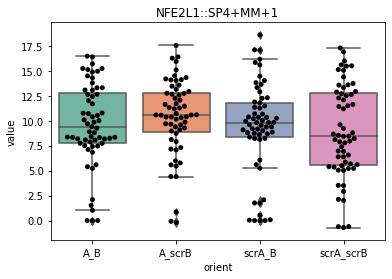

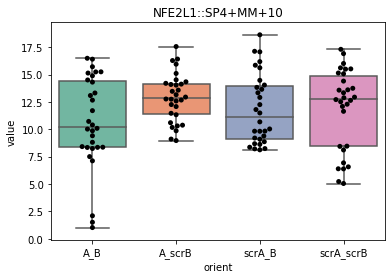

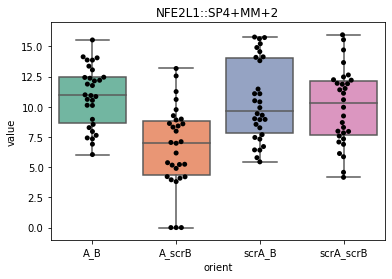

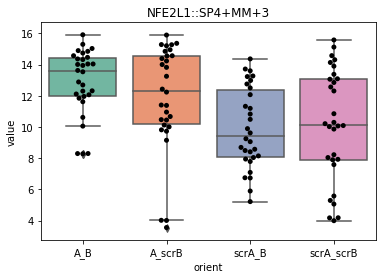

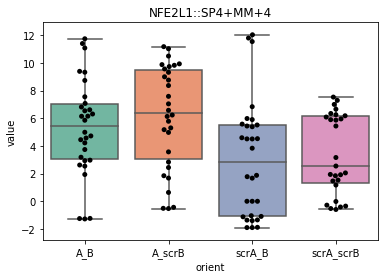

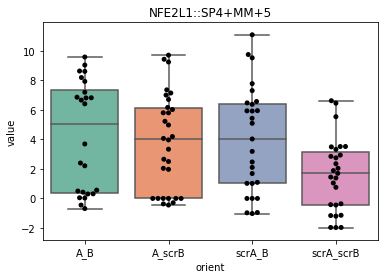

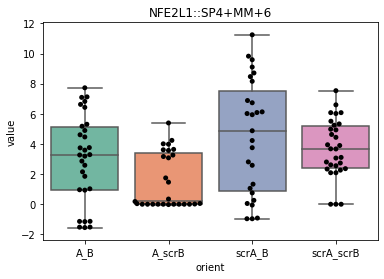

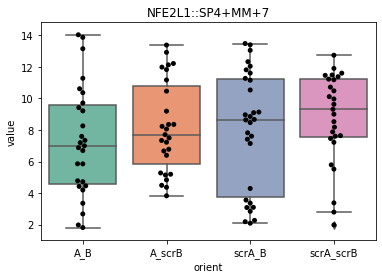

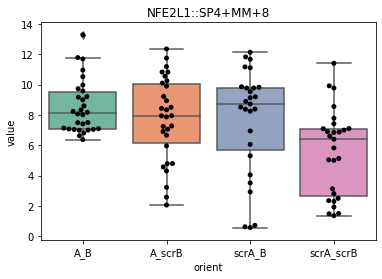

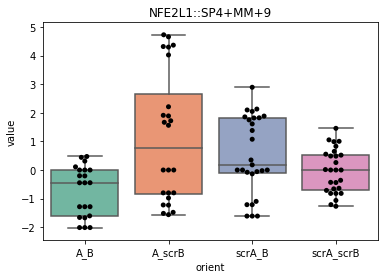

In [77]:
for idx, row in results_df_class_piv.iterrows():
    if row['vocab'] == 'NFE2L1::SP4':
        if row['tissue_match']:
            make_figure(row['vocab'],row['tissue'],row['instance'], save_fig=True)

In [78]:
results_df_piv_match_count

,vocab,tissue,mpra_tissue,class,instance,count,consensus_class,count_consensus,tf1,tf2
0,ARID5B::KLF5,GDSD6,KCD6,other|other|other|other|LEADING_B|other|other|...,1|10|2|3|4|5|6|7|8|9,10,other,0,ARID5B,KLF5
1,ARID5B::LEF1,MM,COLO,other|LEADING_B|other|other|other|AND|other|ot...,1|10|2|3|4|5|6|7|8|9,10,AND,2,ARID5B,LEF1
2,ARID5B::NFE2L1,MM,COLO,other|other|other|other|other|other|other|othe...,1|10|2|3|4|5|6|7|8|9,10,other,0,ARID5B,NFE2L1
3,ARID5B::SOX10,MM,COLO,other|other|LEADING_A|AND|other|other|other|OR...,1|10|2|3|4|5|6|7|8|9,10,other,0,ARID5B,SOX10
4,ARID5B::STAT1,MM,COLO,other|other|other|other|other|other|other|othe...,1|10|2|3|4|5|6|7|8|9,10,other,0,ARID5B,STAT1
...,...,...,...,...,...,...,...,...,...,...
234,TFAP2B::ZNF589,Melanocytes,MC,other|other|other|other|other|other|other|othe...,1|10|2|3|4|5|6|7|8|9,10,other,0,TFAP2B,ZNF589
235,TFAP2C::ZBTB14,SCC,A431,other|other|other|other|other|other|LEADING_B|...,1|10|2|3|4|5|6|7|8|9,10,other,0,TFAP2C,ZBTB14
236,TFAP2C::ZNF219,SCC,A431,other|other|other|AND|other|other|other|other,1|10|2|5|6|7|8|9,8,other,0,TFAP2C,ZNF219
237,THAP1::THRB,Colon,Colon,other|other|other|other|AND|other|LEADING_A|ot...,1|10|2|3|4|5|6|7|8|9,10,LEADING,2,THAP1,THRB


OR KLF15::PRRX1 Melanocytes 3


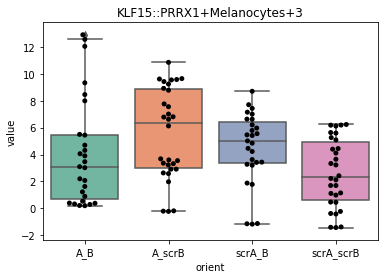

LEADING KLF15::ZFP28 Colon 3


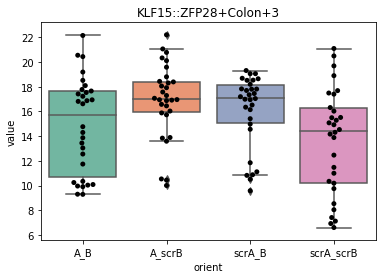

XOR NFE2L1::SP4 MM 5


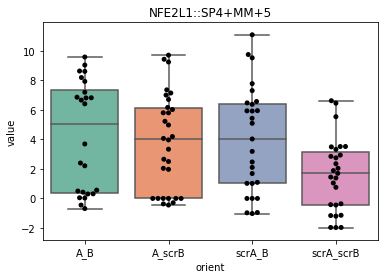

XOR NFE2L1::SP4 MM 9


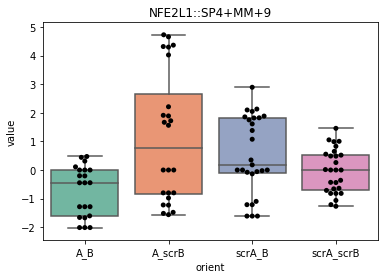

LEADING PAX5::SP4 GM12878 5


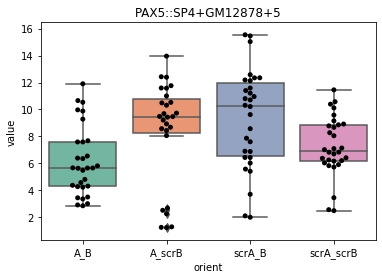

XOR SP1::SP2 SCC 1


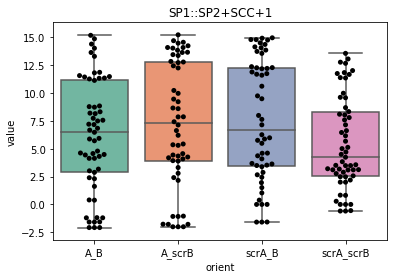

XOR SP1::SP2 SCC 10


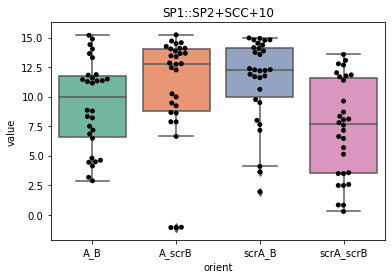

LEADING SP2::TFAP2B Melanocytes 2


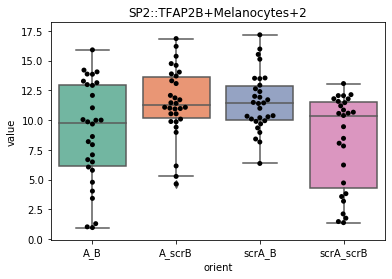

LEADING SP3::ZNF219 SCC 3


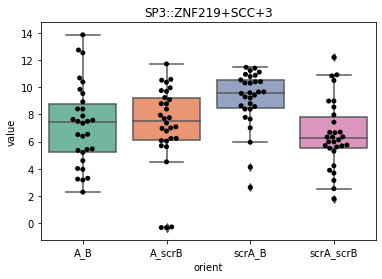

In [79]:
for idx, row in results_df_class_piv.iterrows():
    if row['class'] == 'XOR':
        if row['tissue_match']:
            consensus_class = results_df_piv_match_count[results_df_piv_match_count.vocab==row.vocab].consensus_class.to_list()[0]
            if consensus_class != 'AND':
                if consensus_class!= 'other':
                    print(consensus_class, row.vocab, row.tissue, row.instance)
                    make_figure(row['vocab'],row['tissue'],row['instance'], save_fig=True)

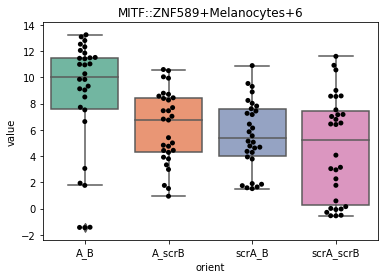

In [80]:
# and
make_figure('MITF::ZNF589','Melanocytes','6',save_fig=True)

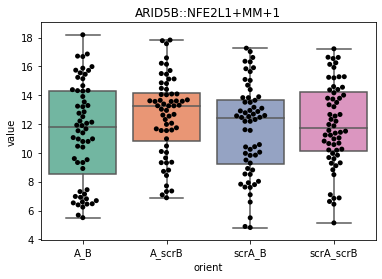

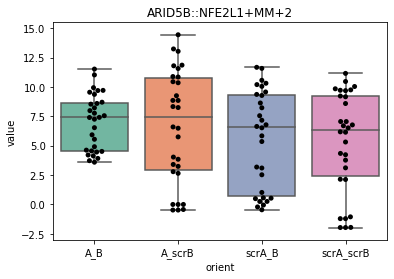

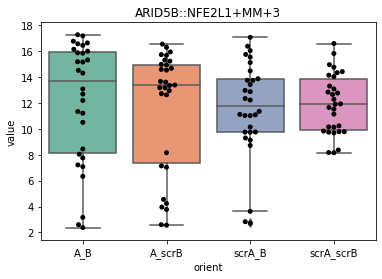

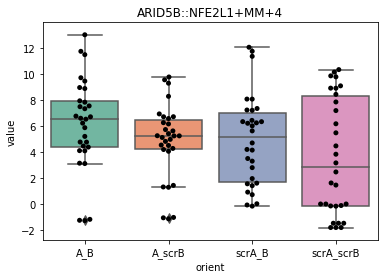

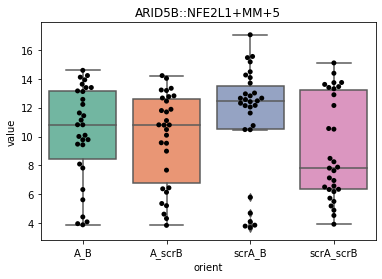

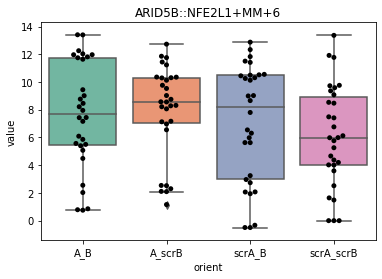

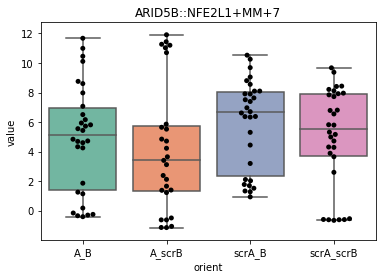

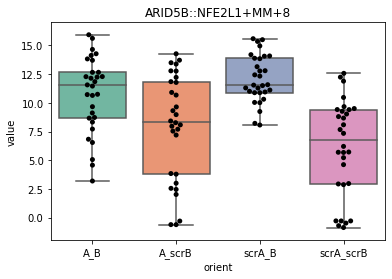

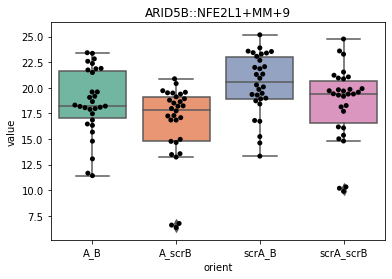

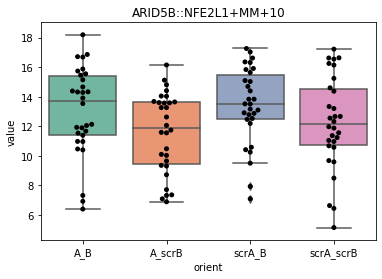

In [81]:
for i in instance_arr:
    	
    make_figure('ARID5B::NFE2L1','MM',i)

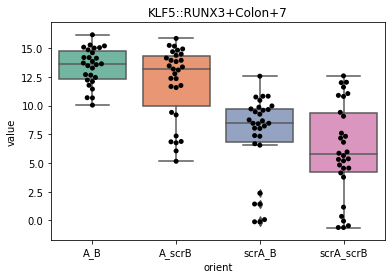

In [82]:
# leading A
make_figure('KLF5::RUNX3','Colon','7',save_fig=True)

(21, 7)
ARID5B::LEF1 MM 5


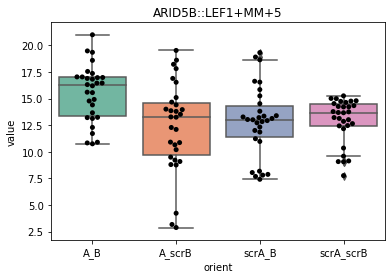

ARID5B::LEF1 MM 8


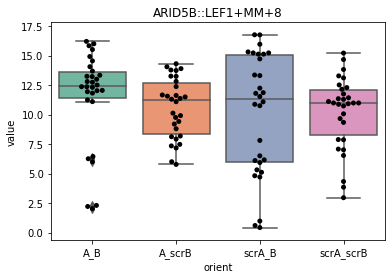

ARNT::SP1 SCC 1


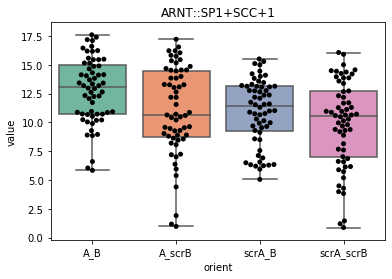

ARNT::SP1 SCC 10


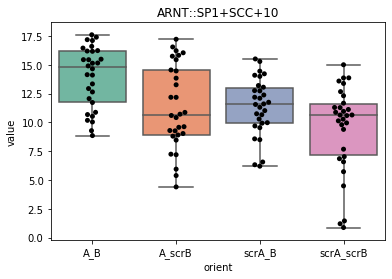

ARNT::SP1 SCC 4


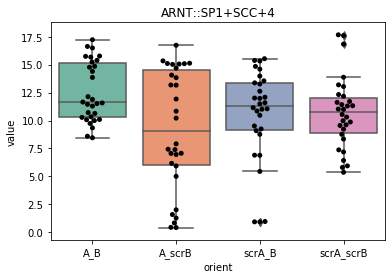

E2F6::SP1 SCC 10


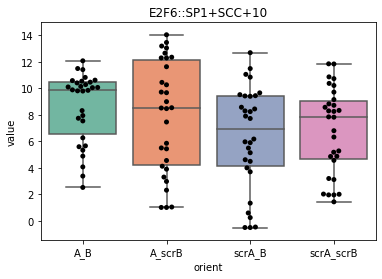

E2F6::SP1 SCC 5


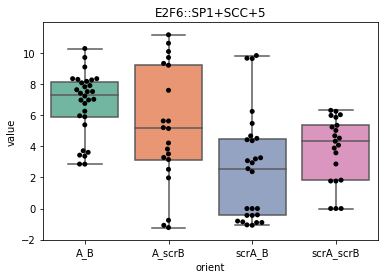

EGR1::SP3 SCC 3


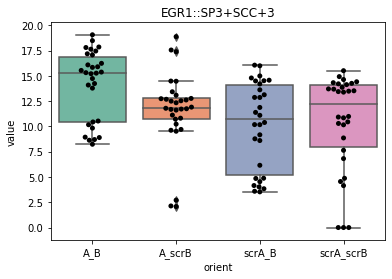

EGR1::SP3 SCC 5


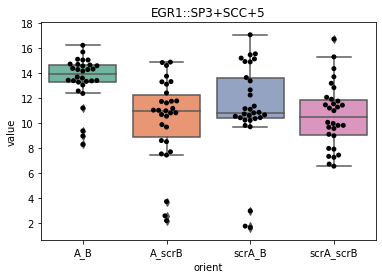

EGR2::NFE2L1 MM 2


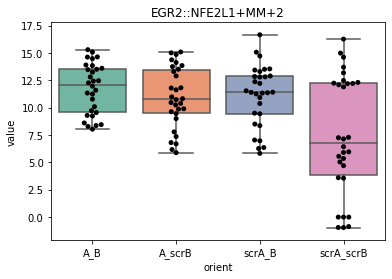

EGR2::NFE2L1 MM 6


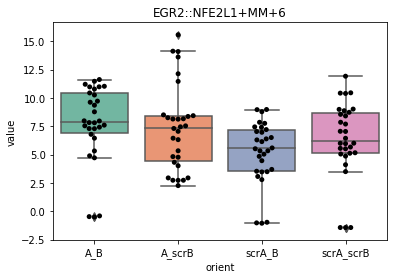

EN2::STAT1 MM 10


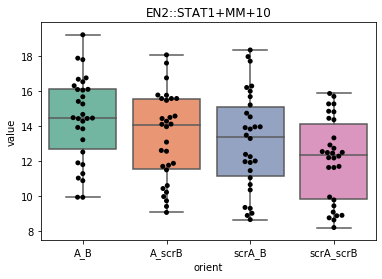

EN2::STAT1 MM 4


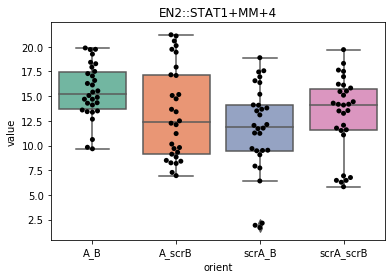

EN2::STAT1 MM 5


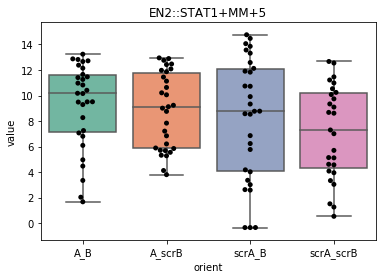

HBP1::STAT1 MM 4


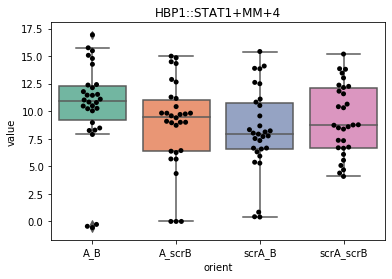

HBP1::STAT1 MM 5


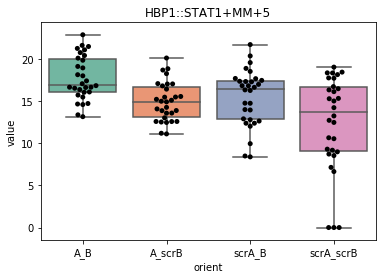

KLF16::TFAP2C SCC 8


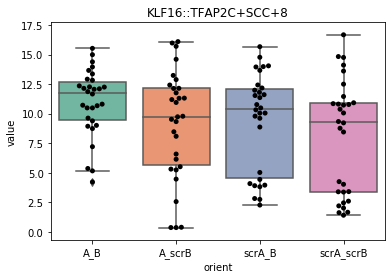

KLF16::TFAP2C SCC 9


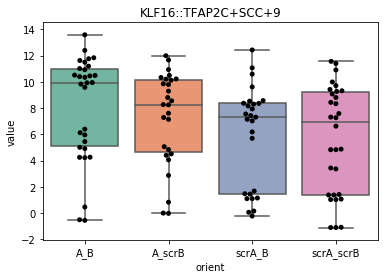

KLF4::KLF5 SCC 6


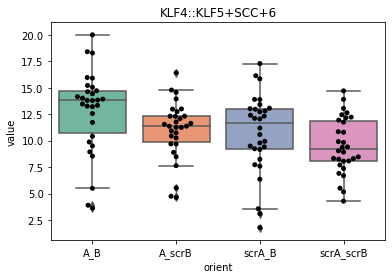

KLF4::KLF5 SCC 8


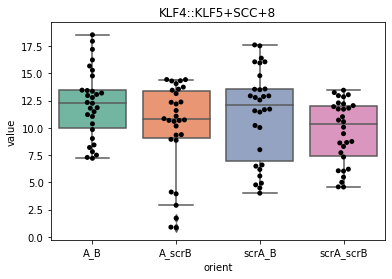

MAZ::SP1 SCC 3


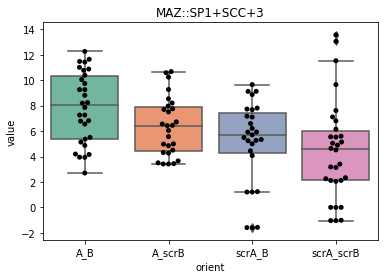

MAZ::SP1 SCC 8


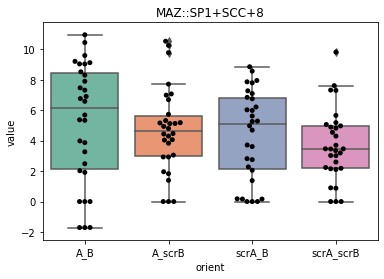

NFAT5::STAT1 MM 10


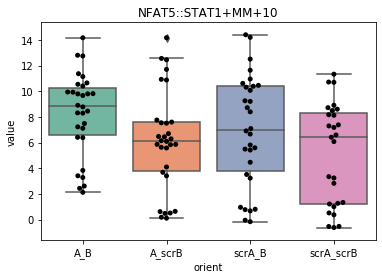

NFAT5::STAT1 MM 6


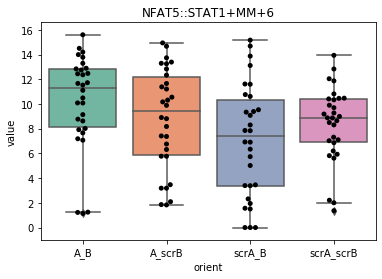

NFATC4::STAT1 MM 10


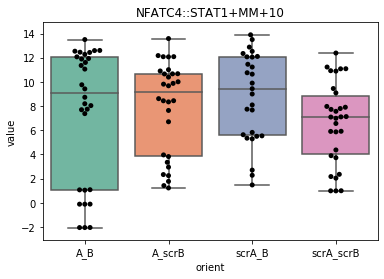

NFATC4::STAT1 MM 2


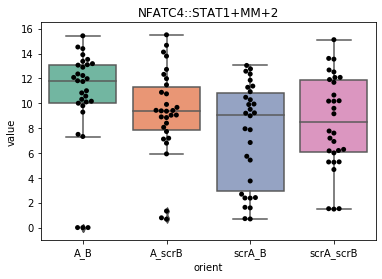

NFE2L1::NR3C1 MM 1


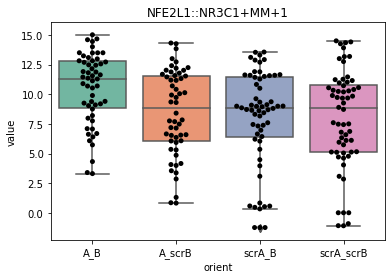

NFE2L1::NR3C1 MM 3


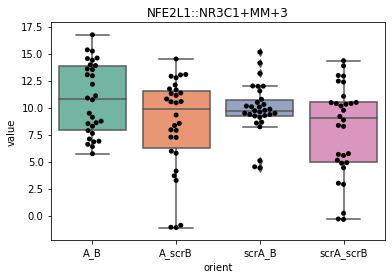

NFE2L1::TBX15 MM 10


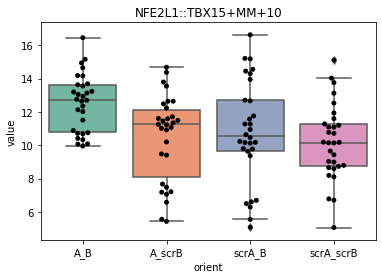

NFE2L1::TBX15 MM 3


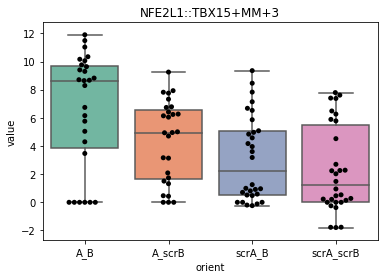

NFE2L1::ZBTB49 MM 5


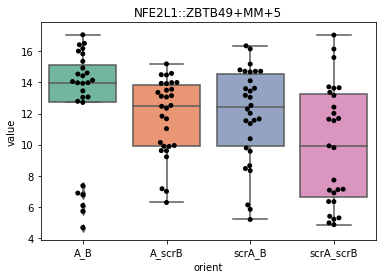

NFE2L1::ZBTB49 MM 9


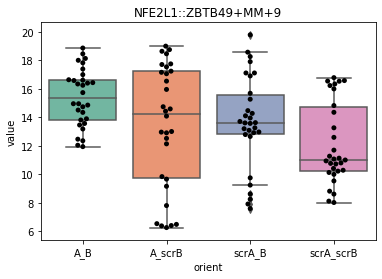

SOX10::SOX13 MM 2


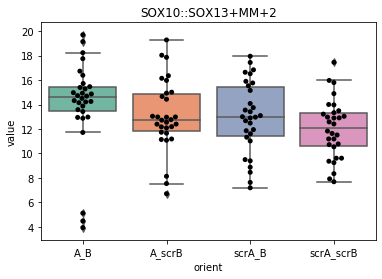

SOX10::SOX13 MM 6


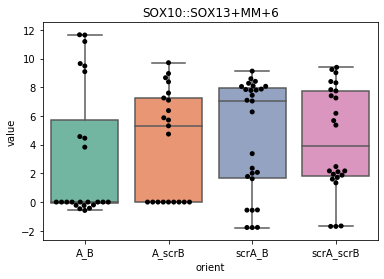

SOX10::SP4 MM 1


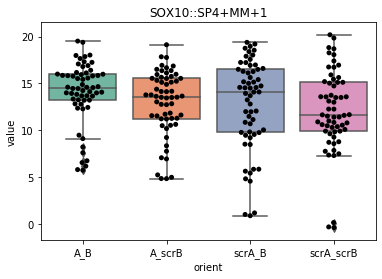

SOX10::SP4 MM 3


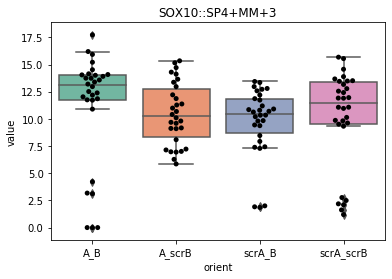

SP1::TFDP1 SCC 2


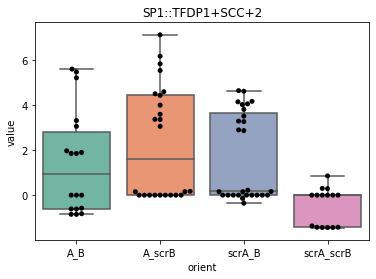

SP1::TFDP1 SCC 7


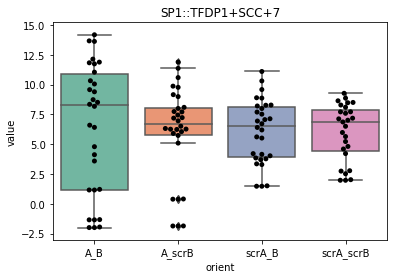

SP1::ZBTB14 SCC 5


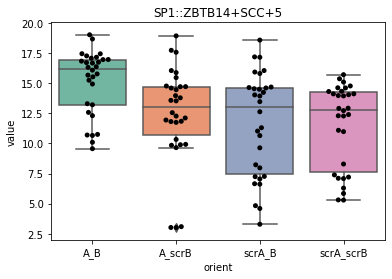

SP1::ZBTB14 SCC 8


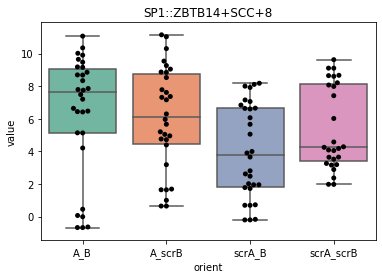

SP1::ZBTB17 SCC 1


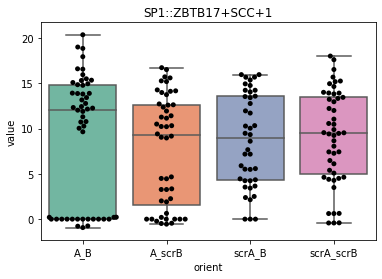

SP1::ZBTB17 SCC 10


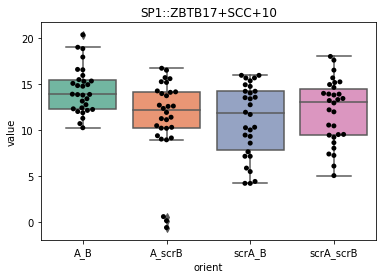

SP1::ZNF770 SCC 5


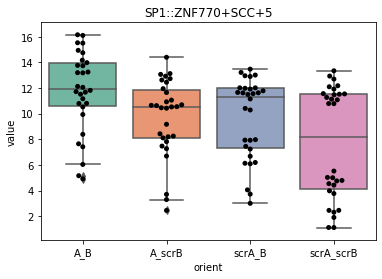

SP1::ZNF770 SCC 6


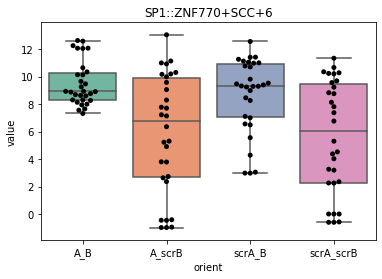

In [83]:
# make plots for the scc or mc 
def find_instances_to_check(row):
    instance_idx_to_check = []
    for instance, x in zip(row['instance'].split('|'), row['class'].split('|')):
        if x==row.consensus_class:
            instance_idx_to_check.append(instance)
    return instance_idx_to_check
filt_df = results_df_piv_match_count[results_df_piv_match_count.consensus_class=='AND']
filt_df = filt_df[filt_df.tissue.isin(['MM','SCC'])]
filt_df['instance_to_check'] = filt_df.apply(find_instances_to_check, axis=1)
filt_df = filt_df.drop(['instance','count','tf1','tf2'],axis=1)
print(filt_df.shape)
for idx, row in filt_df.iterrows():
    for instance in row['instance_to_check']:
        print(row['vocab'], row['tissue'], str(instance))
        make_figure(row['vocab'], row['tissue'], str(instance),save_fig=True)

I like these
NFE2L1::NR3C1 MM 1
ARID5B::LEF1 MM 5
ARNT::SP1 SCC 10
E2F6::SP1 SCC 5
EGR1::SP3 SCC 5
NFE2L1::TBX15 MM 3
SP1::ZBTB14 SCC 5

# 2. make figures
2) individual box plots like my chicken scratch diagram with normal vs cancer for these instances:
- EN2::PRRX1    MC	COLO
- EN2::STAT1    MC	COLO
- HMGA1::STAT1    MC	COLO
- SOX10::SOX13    MC	COLO
- SP2::ZNF324    MC	COLO
- NFATC4::STAT1   MC	COLO
- HMGA1::KLF5    KCD6     A431
- KLF4::KLF5    KCD6	    A431
- PURA::SP1    KCD6     A431


In [84]:
res

NameError: name 'res' is not defined

In [ ]:

def make_figure_comp(vocab, tissues_to_check, df = mpra_counts.reset_index(), 
                     check_pval=False,
                     save_fig=False):
    res =  results_df_piv_match_count[results_df_piv_match_count.vocab==vocab]
    tissue =res.tissue.values[0]
    consensus_class = res.consensus_class.values[0]
    print(tissue)
    print(consensus_class)
    # print(res['class'].values)
    instance_idx_to_check = []
    for instance, x in zip(res.instance.values[0].split('|'), res['class'].to_list()[0].split('|')):
        if x==res.consensus_class.values[0]:
            instance_idx_to_check.append(instance)
    print(instance_idx_to_check)
    
    return_df = pd.DataFrame()
    for instance in instance_idx_to_check:
        instance = str(instance)
        check_str = vocab+'\+'+tissue+'\+'+instance
        title = 'compare_'+'+'.join([vocab, tissue, instance, consensus_class])
        plot_df = df[df['index'].str.contains(check_str)].melt('index')
        plot_df.columns = ['id','sample','value']
        plot_df[['vocab_pair','tissue','instance','orient_bar']]= plot_df['id'].str.split('+',expand=True)
        plot_df[['orient','barcode']]= plot_df['orient_bar'].str.split('.',expand=True)
        plot_df[['mpra_tissue','rep']]= plot_df['sample'].str.split('_',expand=True)
        plot_df.sort_values('orient',inplace=True)
        plot_df = plot_df[plot_df.mpra_tissue.isin(tissues_to_check)]
        
        # subtract median of scrA_scrB condition
        median_df = plot_df[plot_df.orient=='scrA_scrB'].groupby('mpra_tissue').agg({'value':'median'}).reset_index()
        median_df.columns = ['mpra_tissue','med_val']
        plot_df = plot_df.merge(median_df, how='left',on='mpra_tissue')
        plot_df['adj_value'] = plot_df['value'] - plot_df.med_val

        if check_pval:
             # get p-values
            instance_df = plot_df
            print(instance_df.vocab_pair.unique()[0], instance_df.tissue.unique()[0],instance_df.instance.unique()[0])
            tissues = instance_df.mpra_tissue.unique()
            pvals = []
            for orient in ['A_B', 'A_scrB','scrA_B']:
                test_df = instance_df[instance_df.orient==orient]
                A_arr = test_df[test_df.mpra_tissue==tissues[0]].adj_value.values
                B_arr = test_df[test_df.mpra_tissue==tissues[1]].adj_value.values
                pval = scipy.stats.mannwhitneyu(A_arr, B_arr).pvalue
                pvals.append(pval)
            if pvals[0]<0.05: # the A_B config
                print('pvals',pvals)

            else:
                continue
        ax = sns.boxplot(x="orient", y="adj_value", hue="mpra_tissue",#x_order = ['scrA_scrB','scrA_B','A_scrB','A_B'],
                         hue_order = tissues_to_check,
                           data=plot_df, palette="Set2", dodge=True)
#         sns.swarmplot(x="orient", y="adj_value", hue="mpra_tissue",#x_order = ['scrA_scrB','scrA_B','A_scrB','A_B'],
#                          hue_order = tissues_to_check,color='black',
#                            data=plot_df, dodge=True)
        ax.set_title(title)
        if save_fig:
            plt.savefig('../data/processed/snp_motifs/'+title+'.pdf')
        plt.show()
        return_df = pd.concat([return_df, plot_df])
        

    return return_df
    # tissue, instance, df = mpra_counts.reset_index(),

In [ ]:

        
return_df1 = make_figure_comp(vocab = 'EN2::PRRX1',tissues_to_check = ['MC','COLO'],#['KCD6','A431', 
                 save_fig=True)
# make_figure_comp(vocab = 'EN2::STAT1',tissues_to_check = ['MC','COLO'],#['KCD6','A431', 
#                  save_fig=True)
# make_figure_comp(vocab = 'HMGA1::STAT1',tissues_to_check = ['MC','COLO'],#['KCD6','A431', 
#                  save_fig=True)
# make_figure_comp(vocab = 'SOX10::SOX13',tissues_to_check = ['MC','COLO'],#['KCD6','A431', 
#                  save_fig=True)
# make_figure_comp(vocab = 'SP2::ZNF324',tissues_to_check = ['MC','COLO'],#['KCD6','A431', 
#                  save_fig=True)
# make_figure_comp(vocab = 'NFATC4::STAT1',tissues_to_check = ['MC','COLO'],#['KCD6','A431', 
#                  save_fig=True)
return_df2 = make_figure_comp(vocab = 'HMGA1::KLF5',tissues_to_check = ['KCD6','A431'],#['KCD6','A431', 
                 save_fig=True)
# make_figure_comp(vocab = 'KLF4::KLF5',tissues_to_check = ['KCD6','A431'],#['KCD6','A431', 
#                  save_fig=True)
# make_figure_comp(vocab = 'PURA::SP1',tissues_to_check = ['KCD6','A431'],#['KCD6','A431', 
#                  save_fig=True)


In [ ]:
vocab_to_consensus = pd.Series(results_df_piv_match_count.consensus_class.values, 
                               index=results_df_piv_match_count.vocab.values).to_dict()

In [ ]:
# for idx, row in results_df_piv.iterrows():
vignette_df = results_df_piv[results_df_piv.tissue.isin(['GDSD6','SCC','Melanocytes','MM'])]
vignette_df = vignette_df[vignette_df.tissue_match]
vignette_df['consensus_class'] = vignette_df.vocab.map(vocab_to_consensus)
vignette_df = vignette_df[vignette_df['class']!='other']
vignette_df = vignette_df[vignette_df['class']!='OR']
vignette_df = vignette_df[vignette_df['consensus_class']!='other']
vignette_df = vignette_df[vignette_df['consensus_class']!='OR']
print(vignette_df.shape)
for idx, row in vignette_df.iterrows():
    print('=======================')
    if (row.tissue == 'GDSD6') | (row.tissue == 'SCC'):
        tissues_to_check = ['KCD6','A431']
    else:
        tissues_to_check = ['MC','COLO']
    
    return_df = make_figure_comp(vocab = row['vocab'],tissues_to_check = tissues_to_check,
                 save_fig=True,check_pval=True)
    

    #         print(scipy.stats.ttest_ind(A_arr, B_arr))    



### do a t-test and u-test

In [ ]:
import scipy.stats

In [ ]:
instance_df = return_df1[return_df1.instance=='7']
print(instance_df.vocab_pair.unique()[0], instance_df.tissue.unique()[0],instance_df.instance.unique()[0])
instance_df
tissues = instance_df.mpra_tissue.unique()
for orient in ['A_B', 'A_scrB','scrA_B']:
    print(orient)
    test_df = instance_df[instance_df.orient==orient]
    A_arr = test_df[test_df.mpra_tissue==tissues[0]].adj_value.values
    B_arr = test_df[test_df.mpra_tissue==tissues[1]].adj_value.values
    print(scipy.stats.mannwhitneyu(A_arr, B_arr))
    print(scipy.stats.ttest_ind(A_arr, B_arr))    
    

In [ ]:
instance_df = return_df2[return_df2.instance=='4']
print(instance_df.vocab_pair.unique()[0], instance_df.tissue.unique()[0],instance_df.instance.unique()[0])
instance_df
tissues = instance_df.mpra_tissue.unique()
for orient in ['A_B', 'A_scrB','scrA_B']:
    print(orient)
    test_df = instance_df[instance_df.orient==orient]
    A_arr = test_df[test_df.mpra_tissue==tissues[0]].adj_value.values
    B_arr = test_df[test_df.mpra_tissue==tissues[1]].adj_value.values
    print(scipy.stats.mannwhitneyu(A_arr, B_arr))
    print(scipy.stats.ttest_ind(A_arr, B_arr))    
    

In [ ]:
scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)[source]
Compute the Mann-Whitney rank test on samples x and y.

Parameters
x, yarray_like
Array of samples, should be one-dimensional.

use_continuitybool, optional
Whether a continuity correction (1/2.) should be taken into account. Default is True.

alternative{None, ‘two-sided’, ‘less’, ‘greater’}, optional
Defines the alternative hypothesis. The following options are available (default is None):

None: computes p-value half the size of the ‘two-sided’ p-value and a different U statistic. The default behavior is not the same as using ‘less’ or ‘greater’; it only exists for backward compatibility and is deprecated.

‘two-sided’

‘less’: one-sided

‘greater’: one-sided

scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')[source]
Calculate the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

Parameters
a, barray_like
The arrays must have the same shape, except in the dimension corresponding to axis (the first, by default).

axisint or None, optional
Axis along which to compute test. If None, compute over the whole arrays, a, and b.

equal_varbool, optional
If True (default), perform a standard independent 2 sample test that assumes equal population variances [1]. If False, perform Welch’s t-test, which does not assume equal population variance [2].

New in version 0.11.0.

nan_policy{‘propagate’, ‘raise’, ‘omit’}, optional
Defines how to handle when input contains nan. The following options are available (default is ‘propagate’):

‘propagate’: returns nan

‘raise’: throws an error

‘omit’: performs the calculations ignoring nan values

alternative{‘two-sided’, ‘less’, ‘greater’}, optional
Defines the alternative hypothesis. The following options are available (default is ‘two-sided’):

‘two-sided’

‘less’: one-sided

‘greater’: one-sided

